Introduction
In a world… where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

In this kernel I am going to answer some of the questions.

In [29]:
# Import required libraries

import pandas as pd
import numpy as np

# Libraties for visualizations

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('dark_background')

# Display multiple poutput in single cell

from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

# Data

# data
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Data Loading and Exploration

Let's add only train data for now because my main goal for this notebook is to perform data analysis task and not a submisison

In [30]:
 train = pd.read_csv('train.csv')

In [31]:
# Let's have a look at sample data

train.head(n=10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

Let's have some statastics of data.

In [32]:
print('Shape of data is')
train.shape
print('The total number of movies are',train.shape[0])

Shape of data is


(3000, 23)

The total number of movies are 3000


Let's check information of dataset.

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

Observations about the data:

About Dataset:
id: Integer unique id of each movie
belongs_to_collection: Contains the TMDB Id, Name, Movie Poster and Backdrop URL of a movie in JSON format.
budget: Budget of a movie in dollars. Some row contains 0 values which mean unknown.
genres: Contains all the Genres Name & TMDB Id in JSON Format.
homepage: Contains the official URL of a movie.
imdb_id: IMDB id of a movie (string).
original_language: Two digit code of the original language, in which the movie was made.
original_title: The original title of a movie in original_language.
overview: Brief description of the movie.
popularity: Popularity of the movie.
poster_path: Poster path of a movie. You can see full poster image by adding url after this link --> https://image.tmdb.org/t/p/original/
production_companies: All production company name and TMDB id in JSON format of a movie.
production_countries: Two digit code and full name of the production company in JSON format.
release_date: Release date of a movie in mm/dd/yy format.
runtime: Total runtime of a movie in minutes (Integer).
spoken_languages: Two digit code and full name of the spoken language.
status: Is the movie released or rumored?
tagline: Tagline of a movie
title: English title of a movie
Keywords: TMDB Id and name of all the keywords in JSON format.
cast: All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format
crew: Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc.
revenue: Total revenue earned by a movie in dollars.

In [34]:
train.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2637294,en,Joshua,"When Lou, who has become the ""father of the In...",NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Magnificent Seven,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


Let's check missing value in train data.

In [35]:
# Checking NULL value

train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

As we can see that some features have dictiories. I'm dropping all such columns for now.

In [36]:
train = train.drop(['belongs_to_collection','genres','crew','cast','Keywords','spoken_languages','production_companies','production_countries','tagline','overview','homepage'],axis=1)

Create new Column for release day, date, month and year.

In [37]:
train['release_date'] = pd.to_datetime(train['release_date'],infer_datetime_format=True)
train['release_day'] = train['release_date'].apply(lambda t:t.day)
train['release_weekday'] = train['release_date'].apply(lambda t:t.weekday())
train['release_month'] = train['release_date'].apply(lambda t: t.month)
# Year was being interpreted as future dates in some cases soI had to adjust some values

train['release_date'] = pd.to_datetime(train['release_date'])

# Extract the year from 'release_date' using lambda function
train['release_year'] = train['release_date'].apply(lambda t: t.year if t.year < 2018 else t.year - 100)
print(train['release_year'])

C:\Users\gohpaulc\AppData\Local\Temp\ipykernel_20244\3429791588.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  train['release_date'] = pd.to_datetime(train['release_date'],infer_datetime_format=True)
C:\Users\gohpaulc\AppData\Local\Temp\ipykernel_20244\3429791588.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['release_date'] = pd.to_datetime(train['release_date'],infer_datetime_format=True)


0       2015
1       2004
2       2014
3       2012
4       2009
        ... 
2995    1994
2996    2013
2997    1996
2998    2004
2999    2011
Name: release_year, Length: 3000, dtype: int64


Data Analysis and Visualization

1. Which movie made the highest revenue?

In [38]:
train[train['revenue']==train['revenue'].max()]

,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year
1126,1127,220000000,tt0848228,en,The Avengers,89.887648,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,2012-04-25,143.0,Released,The Avengers,1519557910,25,2,4,2012


In [39]:
train[['id','title','budget','revenue']].sort_values(['revenue'],ascending=False).head(10).style.background_gradient(subset='revenue',cmap='BuGn')

,id,title,budget,revenue
1126,1127,The Avengers,220000000,1519557910
1761,1762,Furious 7,190000000,1506249360
2770,2771,Avengers: Age of Ultron,280000000,1405403694
684,685,Beauty and the Beast,160000000,1262886337
2322,2323,Transformers: Dark of the Moon,195000000,1123746996
906,907,The Dark Knight Rises,250000000,1084939099
2135,2136,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2562,2563,Finding Dory,200000000,1028570889
881,882,Alice in Wonderland,200000000,1025491110
734,735,Zootopia,150000000,1023784195


2. Which movie is the most expensive?

In [40]:
train[train['budget']==train['budget'].max()]

,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year
2135,2136,380000000,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,27.88772,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg,2011-05-14,136.0,Released,Pirates of the Caribbean: On Stranger Tides,1045713802,14,5,5,2011


In [41]:
train[['id','title','budget','revenue']].sort_values(['budget'],ascending=False).head(10).style.background_gradient(subset=['budget','revenue'],cmap='PuBu')

,id,title,budget,revenue
2135,2136,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2209,2210,Pirates of the Caribbean: At World's End,300000000,961000000
2770,2771,Avengers: Age of Ultron,280000000,1405403694
1425,1426,Superman Returns,270000000,391081192
1270,1271,John Carter,260000000,284139100
1630,1631,Transformers: The Last Knight,260000000,604942143
2532,2533,The Hobbit: An Unexpected Journey,250000000,1021103568
961,962,Harry Potter and the Half-Blood Prince,250000000,933959197
906,907,The Dark Knight Rises,250000000,1084939099
666,667,The Hobbit: The Desolation of Smaug,250000000,958400000


3. Which movide is the longest?

In [42]:
train[train['runtime']==train['runtime'].max()]

,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year
1211,1212,18000000,tt1321865,en,Carlos,4.558075,/obHJeOHn8J5XD049nj7KVSpAMEW.jpg,2010-05-19,338.0,Released,Carlos,871279,19,2,5,2010


(array([ 14.,   1.,   0.,   0.,   2.,   0.,   1.,   6.,  33., 132., 433.,
        711., 523., 407., 269., 184., 110.,  53.,  45.,  27.,  16.,  13.,
         10.,   2.,   1.,   4.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.14083333, 0.28166667, 0.4225    , 0.56333333,
        0.70416667, 0.845     , 0.98583333, 1.12666667, 1.2675    ,
        1.40833333, 1.54916667, 1.69      , 1.83083333, 1.97166667,
        2.1125    , 2.25333333, 2.39416667, 2.535     , 2.67583333,
        2.81666667, 2.9575    , 3.09833333, 3.23916667, 3.38      ,
        3.52083333, 3.66166667, 3.8025    , 3.94333333, 4.08416667,
        4.225     , 4.36583333, 4.50666667, 4.6475    , 4.78833333,
        4.92916667, 5.07      , 5.21083333, 5.35166667, 5.4925    ,
        5.63333333]),
 <BarContainer object of 40 artists>)

Text(0.5, 1.0, 'Distribution of length of film in hours')

Text(0.5, 0, 'Duration of Movie in Hours')

Text(0, 0.5, 'Number of Movies')

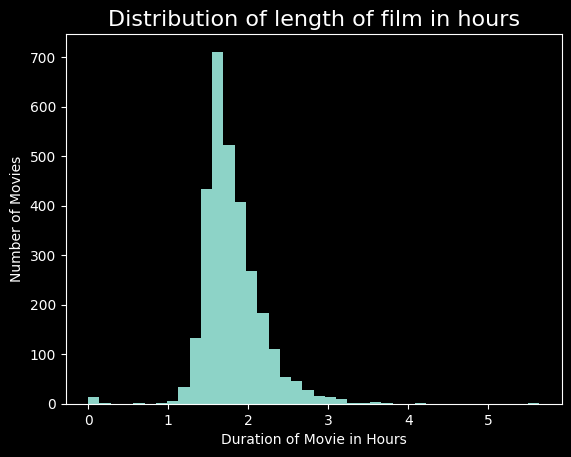

In [43]:
plt.hist(train['runtime'].fillna(0)/60,bins=40)
plt.title('Distribution of length of film in hours',fontsize=16,color='white')
plt.xlabel('Duration of Movie in Hours')
plt.ylabel('Number of Movies')

In [44]:
train[['id','title','runtime','budget','revenue']].sort_values(['runtime'],ascending=False).head(10).style.background_gradient(subset=['runtime','budget'],cmap='YlGn')

,id,title,runtime,budget,revenue
1211,1212,Carlos,338.000000,18000000,871279
1922,1923,Cleopatra,248.000000,31115000,71000000
523,524,The Ten Commandments,220.000000,13000000,122700000
1302,1303,Heaven's Gate,219.000000,44000000,3484331
1914,1915,Gods and Generals,214.000000,56000000,12923936
2353,2354,Jodhaa Akbar,213.000000,8376800,13000000
625,626,Ben-Hur,212.000000,15000000,146900000
1975,1976,Chapiteau-Show,207.000000,2000000,393816
1731,1732,Hey Ram,199.000000,3900000,4900000
2120,2121,Spartacus,197.000000,12000000,60000000


Carlos is the longest movie, with 338 minutes (5 hours and 38 minutes) of runtime.

4. In which year most movies were released?

<Figure size 2000x1200 with 0 Axes>

<Axes: ylabel='count'>

Text(0.5, 1.0, 'Movie Release count by Year')

Text(0.5, 0, 'Release Year')

Text(0, 0.5, 'Number of Movies Released')

(array([0]), [Text(0, 0, '0')])

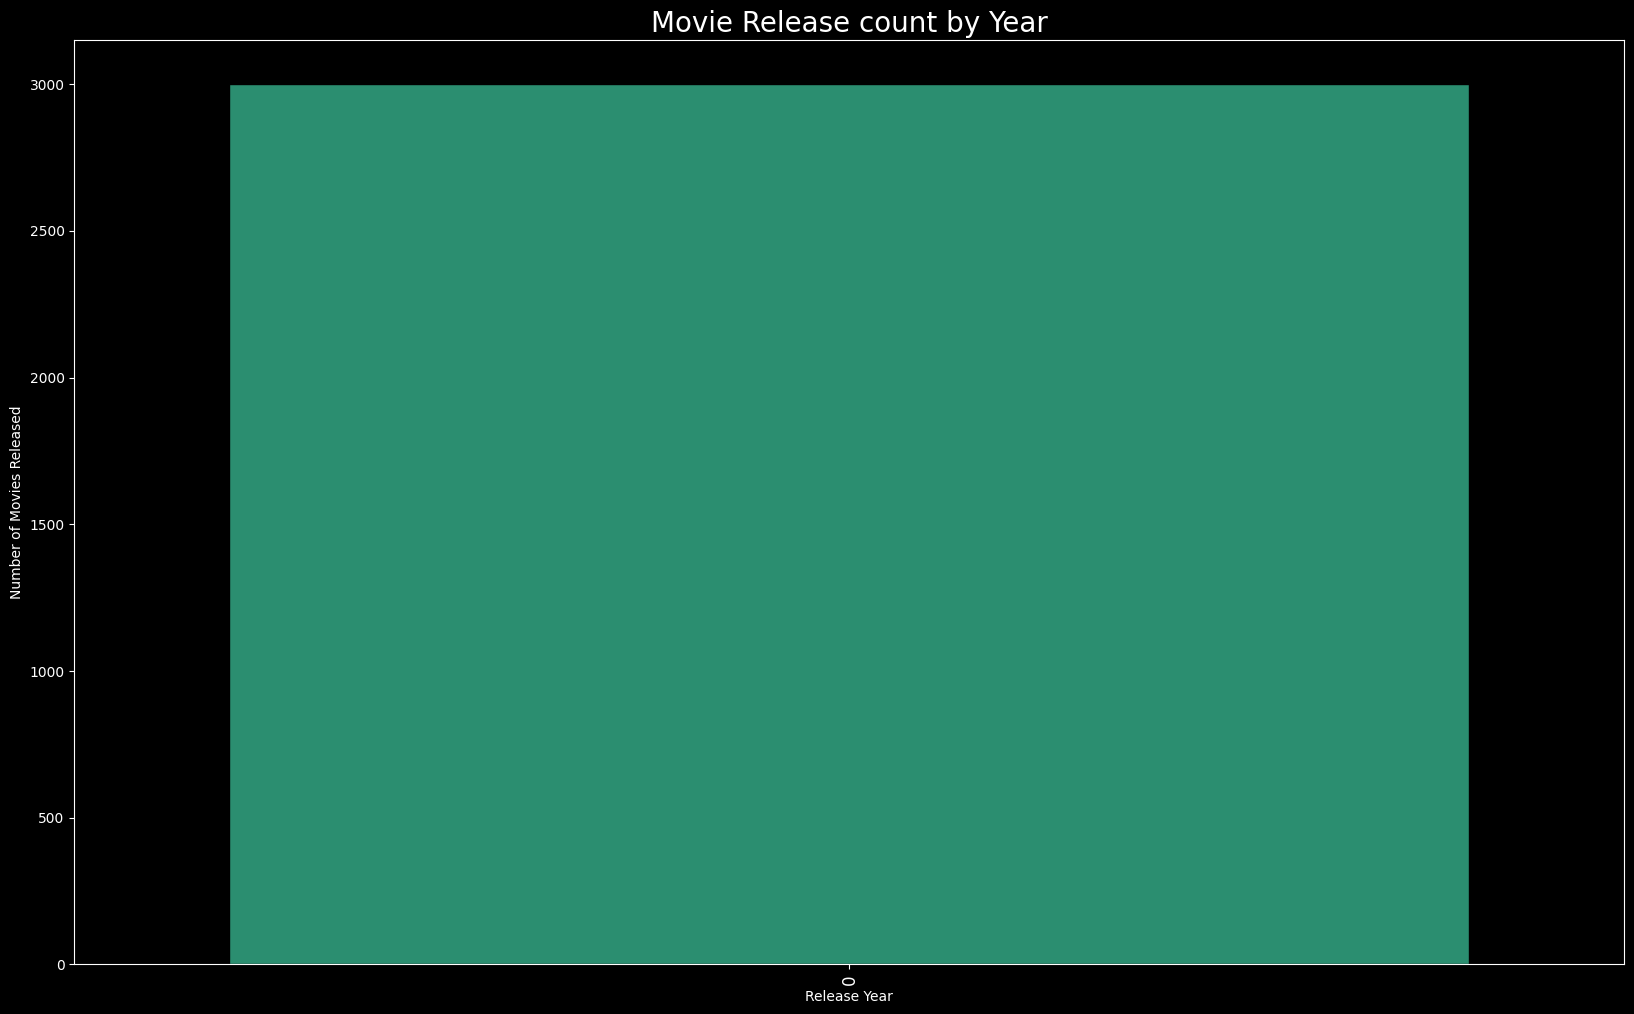

In [45]:
plt.figure(figsize=(20, 12))
sns.countplot(train['release_year'].sort_values(), palette="Dark2", edgecolor=(0, 0, 0))
plt.title("Movie Release count by Year", fontsize=20)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.xticks(fontsize=12, rotation=90)
plt.show()

In [46]:
train['release_year'].value_counts().head()

release_year
2013    141
2015    128
2010    126
2012    125
2016    125
Name: count, dtype: int64

In 2013 total 141 movies were released.

5. Movies with Highest and Lowest ratings.

In [47]:
train[train['popularity']==train['popularity'].max()][['original_title','popularity','release_date','revenue']]

,original_title,popularity,release_date,revenue
518,Wonder Woman,294.337037,2017-05-30,820580447


In [48]:
train[train['popularity']==train['popularity'].min()][['original_title','popularity','release_date','revenue']]


,original_title,popularity,release_date,revenue
2556,Big Time,0.000001,1988-09-15,148426


Lets create popularity distribution plot.

<Figure size 2000x1200 with 0 Axes>

C:\Users\gohpaulc\AppData\Local\Temp\ipykernel_20244\1062240037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['popularity'], kde=False)


<Axes: xlabel='popularity'>

Text(0.5, 1.0, 'Movie Popularity Count')

Text(0.5, 0, 'Popularity')

Text(0, 0.5, 'Count')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350')])

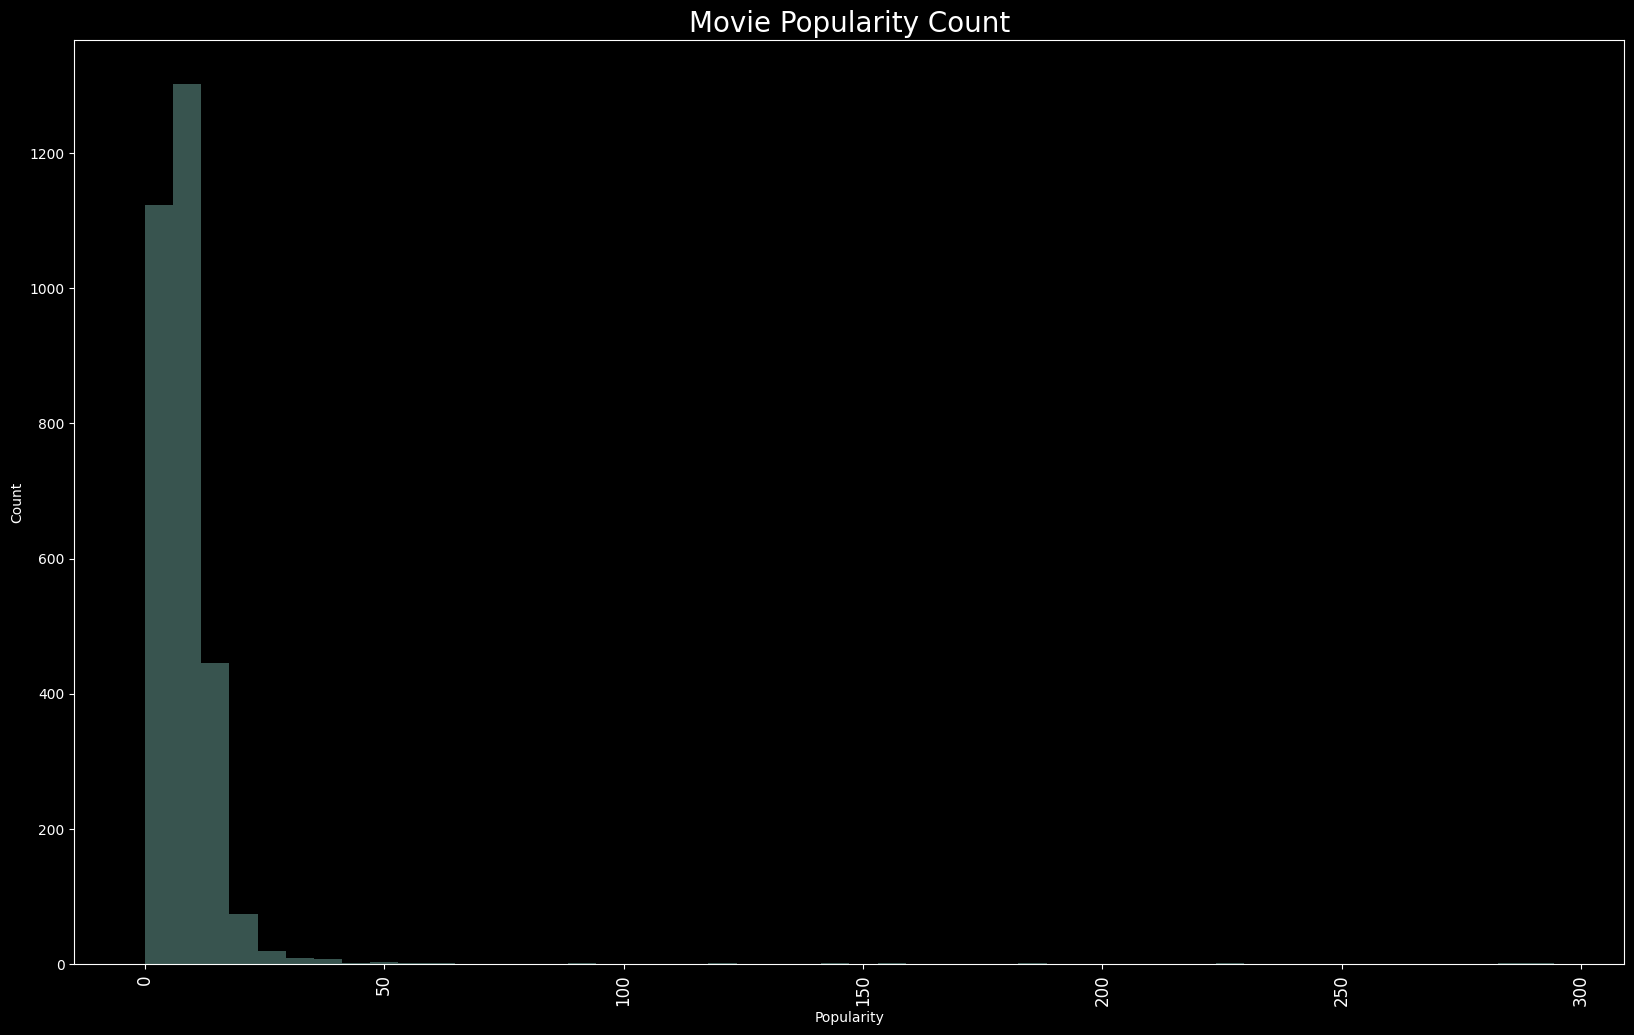

In [49]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.distplot(train['popularity'], kde=False)
plt.title("Movie Popularity Count",fontsize=20)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.xticks(fontsize=12,rotation=90)
plt.show()

Wonder Woman movie have highest popularity of 294.33 whereas Big Time movie have lowest popularity which is 0.

6. In which month most movies are released from 1921 to 2017?

<Figure size 2000x1200 with 0 Axes>

<Axes: ylabel='count'>

Text(0.5, 1.0, 'Movie Release count by Month')

Text(0.5, 0, 'Release Month')

Text(0, 0.5, 'Number of Movies Release')

(array([0]), [Text(0, 0, '0')])

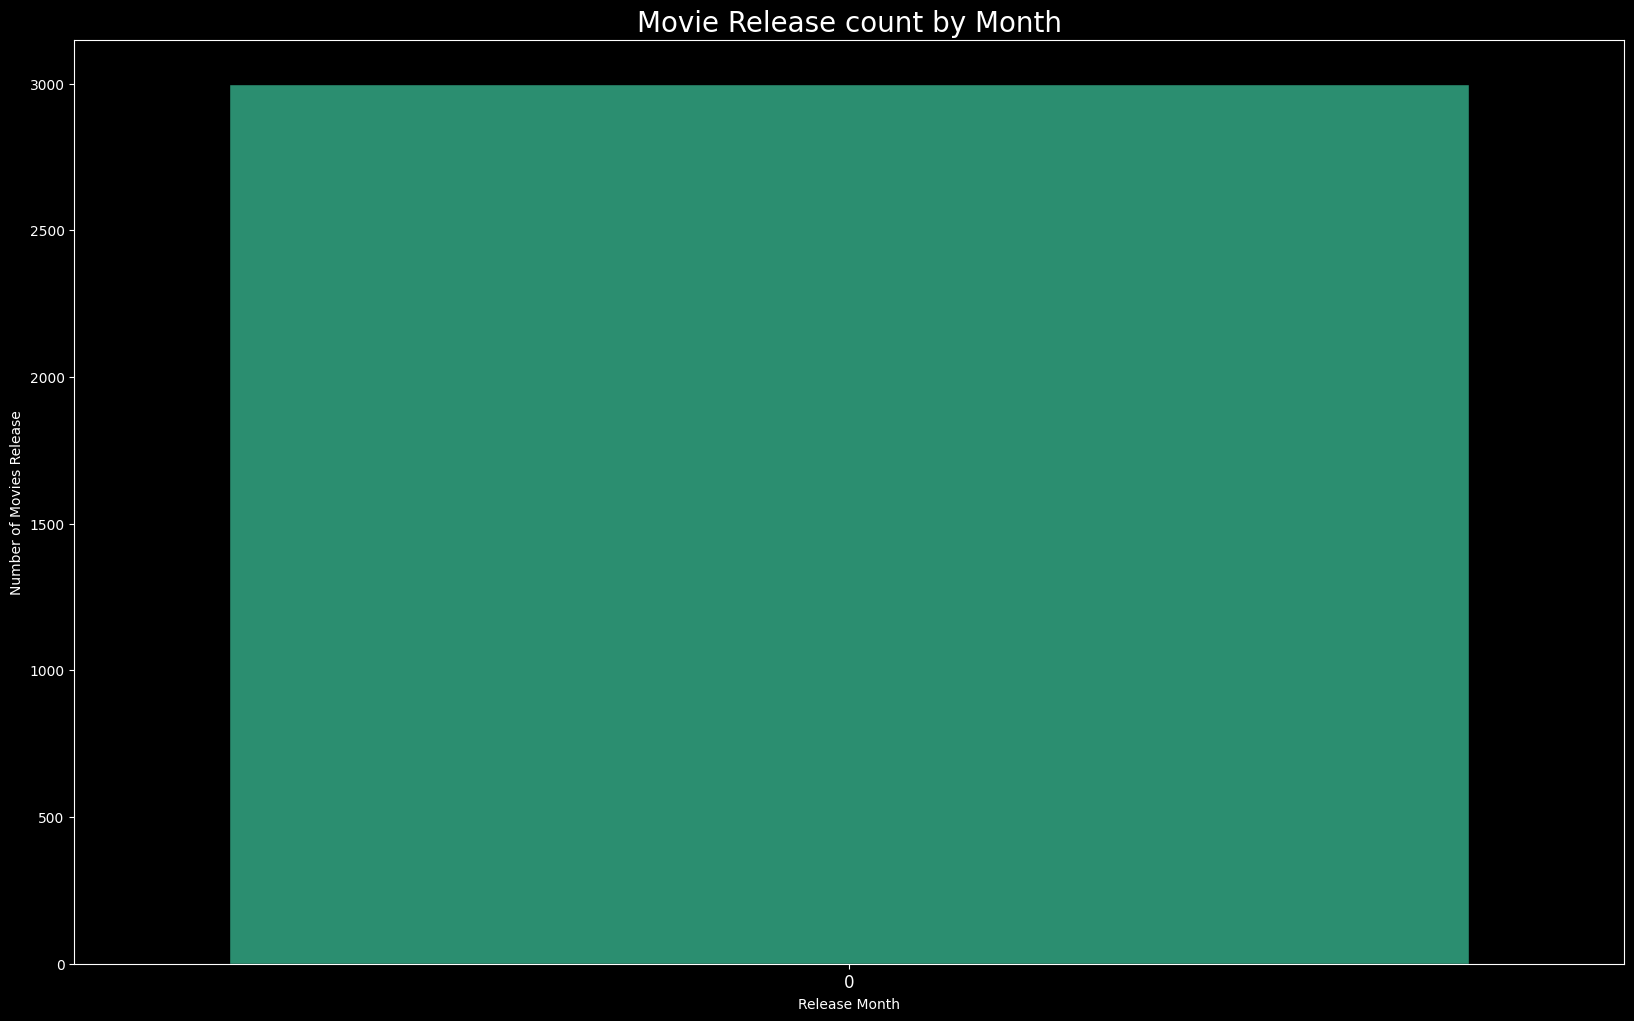

In [50]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(train['release_month'].sort_values(), palette = "Dark2", edgecolor=(0,0,0))
plt.title("Movie Release count by Month",fontsize=20)
plt.xlabel('Release Month')
plt.ylabel('Number of Movies Release')
plt.xticks(fontsize=12)
plt.show()

In [51]:
train['release_month'].value_counts()

release_month
9     362
10    307
12    263
8     256
4     245
3     238
6     237
2     226
5     224
11    221
1     212
7     209
Name: count, dtype: int64

In september month most movies are relesed which is around 362.

7. On which date of month most movies are released?

<Figure size 2000x1200 with 0 Axes>

<Axes: ylabel='count'>

Text(0.5, 1.0, 'Movie Release count by Day of Month')

Text(0.5, 0, 'Release Day')

Text(0, 0.5, 'Number of Movies Release')

(array([0]), [Text(0, 0, '0')])

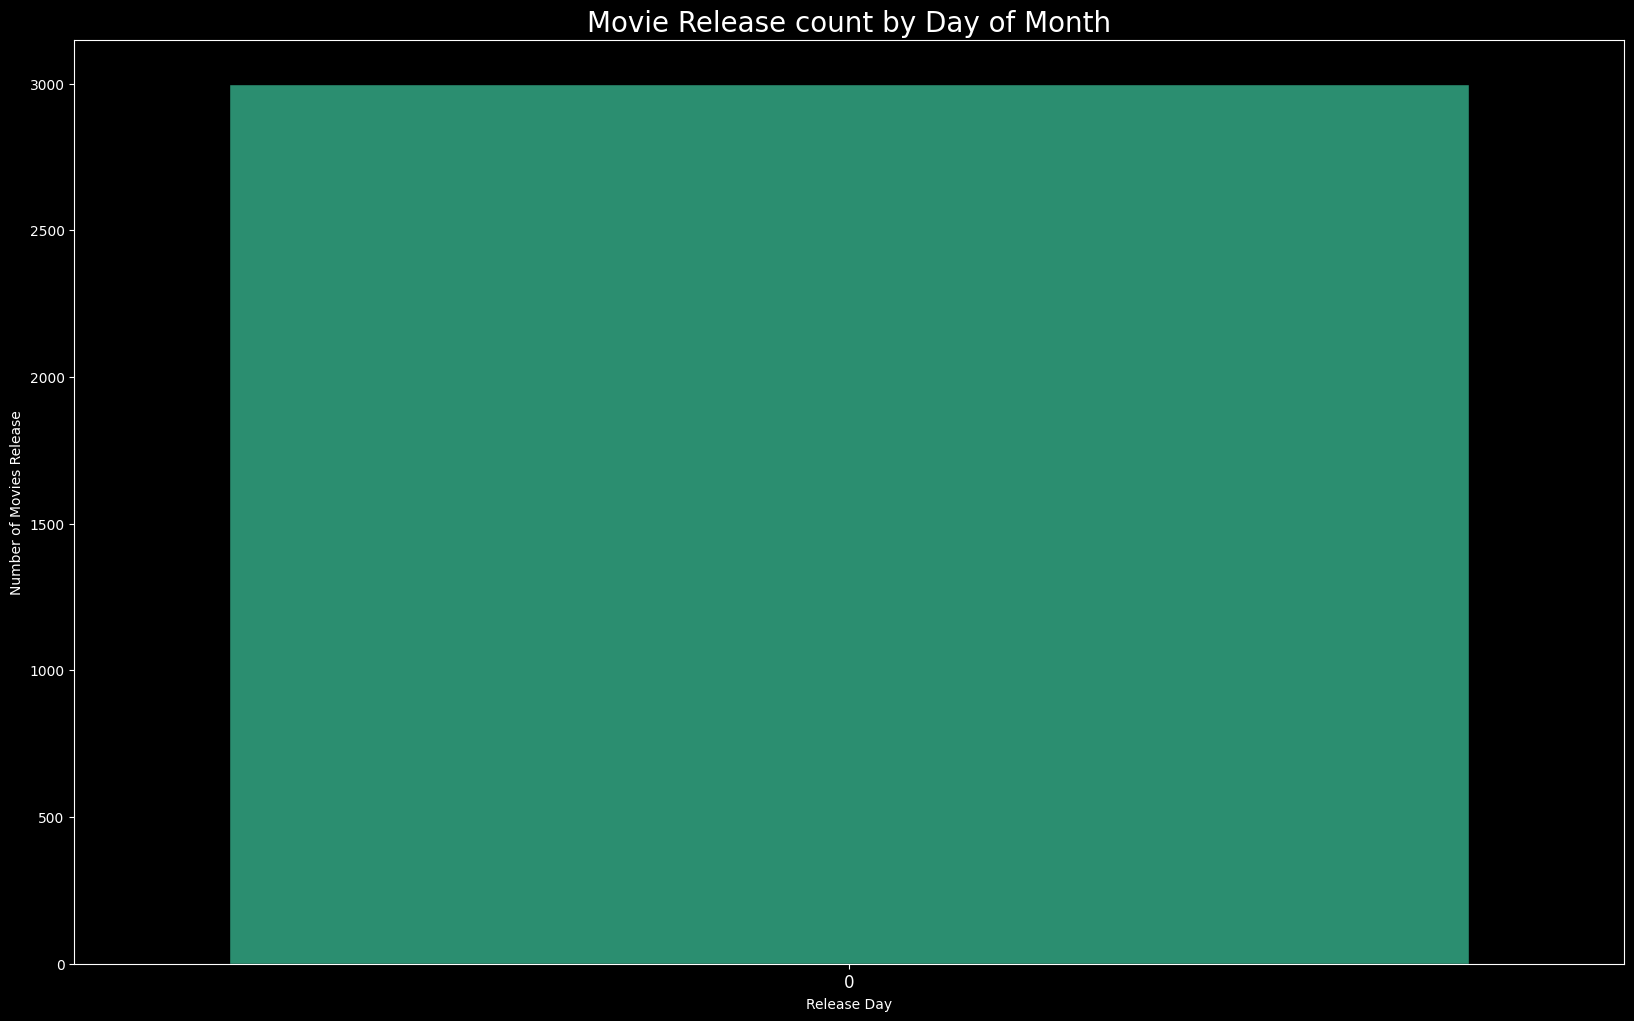

In [52]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.countplot(train['release_day'].sort_values(), palette = "Dark2", edgecolor=(0,0,0))
plt.title("Movie Release count by Day of Month",fontsize=20)
plt.xlabel('Release Day')
plt.ylabel('Number of Movies Release')
plt.xticks(fontsize=12)
plt.show()

In [53]:
train['release_day'].value_counts()

release_day
1     152
15    126
12    122
7     110
6     107
16    106
25    106
13    106
17    106
9     104
10    104
14    104
22    102
8     101
21     99
18     98
24     97
5      96
2      94
19     94
11     93
4      88
20     87
23     85
26     82
3      80
30     75
28     74
27     74
29     72
31     56
Name: count, dtype: int64

On first date highest number of movies are released, 152.

8. On which day of week most movies are released?

<Figure size 2000x1200 with 0 Axes>

<Axes: ylabel='count'>

Text(0.5, 0, 'Release Day of Week')

Text(0, 0.5, 'Number of Movies Release')

([<matplotlib.axis.XTick at 0x22e001e4290>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

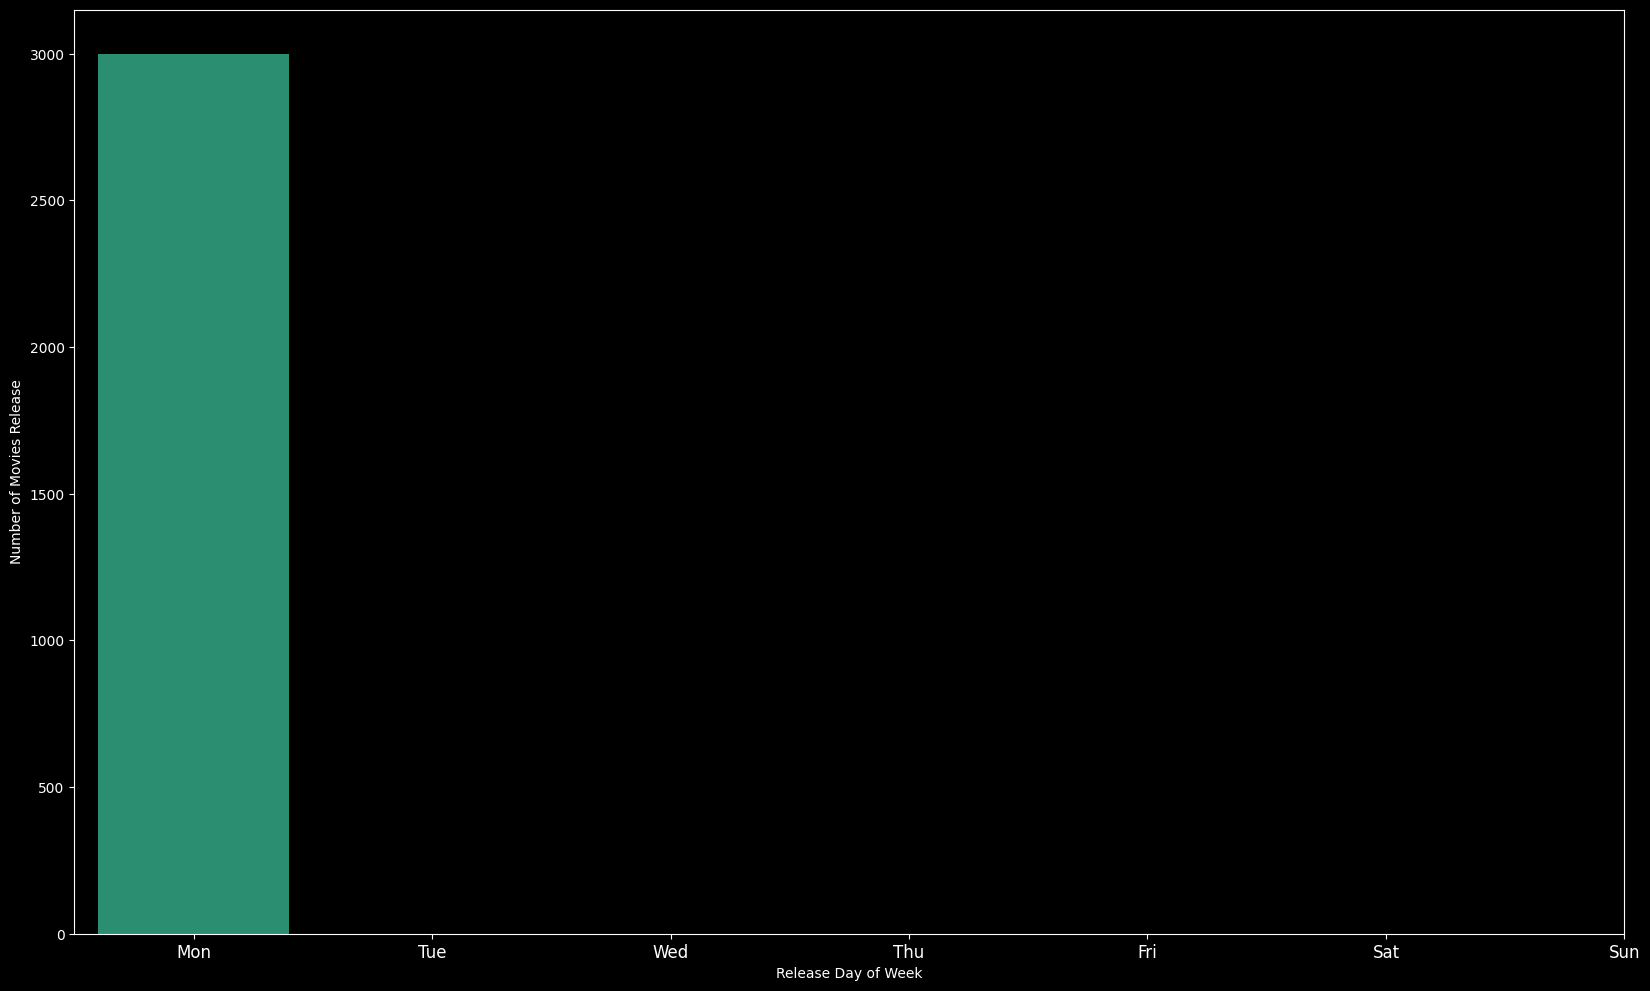

In [54]:
plt.figure(figsize=(20,12))
sns.countplot(train['release_weekday'].sort_values(), palette='Dark2')
loc = np.array(range(len(train['release_weekday'].unique())))
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xlabel('Release Day of Week')
plt.ylabel('Number of Movies Release')
plt.xticks(loc, day_labels, fontsize=12)
plt.show()

In [55]:
train['release_weekday'].value_counts()


release_weekday
4    1335
3     607
2     450
1     195
5     155
0     138
6     120
Name: count, dtype: int64

Highest number of movies released on friday.